<a href="https://colab.research.google.com/github/yexf308/MachineLearning/blob/main/homework/HW4/592Fa22HW4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 4
## Homework guideline
- The deadline is Nov 11th 10:30am. Submission after the deadline will not be graded. 

- Submit your work(your reasoning and your code) as a SINGLE .ipynb document. Please rename the document as _HW1_YOURNAME.ipynb_ (for example, _HW1_FELIX.ipynb_). You are responsible for checking that you have correctly submitted the correct document. If your code cannot run, you may receive NO point. 

- Please justify all short answers with a brief explanation. It is highly recommended to use latex in the markdown. 

- You only use the Python packages included in the following cell. You are not allowed to use other advanced package or modules unless you are permitted to. 

- In your final submission include the plots produced by the unedited code as presented below, as well as any additional plots produced after editing the code during the course of a problem. You may find it necessary to copy/paste relevant code into additional cells to accomplish this.

- Feel free to use the lecture notes and other resources. But you
must understand, write, and hand in your own answers. In addition, you must write and submit
your own code in the programming part of the assignment (we may run your code).
If you copy someone else homework solution, both of you may receive ZERO point. 


- Colab is preferred. However, if you use Anaconda, please download the .mat file locally and save it to the same folder as this homework file. 

**Collaboration:** List the names of all people you collaborated with and for which question(s). This is important!


$\def\m#1{\mathbf{#1}}$
$\def\mm#1{\boldsymbol{#1}}$
$\def\mb#1{\mathbb{#1}}$
$\def\c#1{\mathcal{#1}}$
$\def\mr#1{\mathrm{#1}}$
$\newenvironment{rmat}{\left[\begin{array}{rrrrrrrrrrrrr}}{\end{array}\right]}$
$\newcommand\brm{\begin{rmat}}$
$\newcommand\erm{\end{rmat}}$
$\newenvironment{cmat}{\left[\begin{array}{ccccccccc}}{\end{array}\right]}$
$\newcommand\bcm{\begin{cmat}}$
$\newcommand\ecm{\end{cmat}}$

In [ ]:
%pylab inline 
import numpy.linalg as LA
from scipy.spatial.distance import cdist


## Set some default values of the the matplotlib plots
plt.rcParams['figure.figsize'] = (8.0, 8.0)  # Set default plot's sizes
plt.rcParams['axes.grid'] = True  # Show grid by default in figures

Populating the interactive namespace from numpy and matplotlib


# Q1: Implementing Batch Naive Bayes (30pt)

Implement a multinomial naive Bayes classifier in the `NaiveBayes` class. (You should know how to code python in Object-oriented programming.) Your implementation should support add-one smoothing. Whether or not to use add-one smoothing is controlled via an argument to the constructor; add-one smoothing is enabled by default.

-  `__init(useAddOneSmoothing=True)__` : constructor.

- `fit(X,Y)`: method to train the naive Bayes model.

- `predict(X)`: method to use the trained naive Bayes model for prediction. 

- `predictProbs(X)`: outputs a matrix of predicted posterior class probabilities. 


The training data for multinomial naive Bayes is specified as feature counts: `X[i,j]` is the number of times
feature $j$ occurs in instance $i$ (or you can think of it as that instance $i$ is characterized by a particular
real-valued amount of feature $j$).

We are here using the multinomial distribution. Suppose our dataset has $d$ features and $K$ classes. Then the
multinomial distribution for a particular sample $(\m{x},y)$, where $\m{x}=[x_1,\dots, x_D]\in \mb{R}^D$ and $y\in \{1,\dots, K\}$ is 
\begin{align}
p(\m{x}|y) = \frac{(\sum_i x_i)! }{x_1! x_2! \dots x_D!} p_{y1}^{x_1}p_{y2}^{x_2}\dots p_{yD}^{x_D}
\end{align}
and the label distribution $p(y)$ (in this case, a categorical distribution) is $\mm\pi=[\pi_1, \dots, \pi_K]$. 

The naive Bayes assumption (that each instance is independent given the class label) is used in the sense that
that we are assuming the generative process is

- Picking a class $y$ according to the label distribution
$p(y)$. 

- Generate a sequence of features, independently according to a multinomial distribution conditioned on the class $y$: $\m{p}_y=(p_{y1}, p_{y2}, \dots, p_{yD})$ with $\sum_i p_{yi}=1$. 

What you are given is the count of each feature generated by this process stored in a vector $\m{x}$. This is a useful model for predicting, say, document classes, where $d$ is size of vocabulary
and $K$ is number of document classes. 

The MLE parameter estimation for this naive Bayes probabilistic model is
- The label distribution $p(y)=\hat{\mm\pi}$
\begin{align}
\hat{\mm{\pi}} = \frac{N_c}{N}
\end{align}
where $N_c$ is the number of samples with label $y=c$ and $N$ is the total samples. 

- The multinormial distribution with label $y=c$ is $\hat{\m{p}}_c=[\hat{p}_{c1}, \dots, \hat{p}_{cD}]$ and 
\begin{align}
\hat{p}_{ci}  =\frac{N_{ci}}{N_c} 
\end{align}
where $N_{ci}$ is total occurrences of feature $i$ in samples with label $y=c$. 


- When using add-one smoothing, we estimate $\hat{p}_{ci} $ with 
\begin{align}
\hat{p}_{ci}  = \frac{N_{ci}+1}{N_c +D}
\end{align}

During prediction, given feature count vector $\m{x}$, we estimate label $y$ posterior probability with
\begin{align}
p(y|\m{x})\propto p(y)\hat{p}_{y1}^{x_1}p_{y2}^{x_2}\dots p_{yD}^{x_D}
\end{align}
up to normalization. You might want to implement the equation above with summation of log probabilities
for better numerical stability. If you choose to do so, you would need another **numerical trick** below. 

After
obtaining the log probabilities for each classes, $\m{z}=\bcm\log p(y=1|\m{x}),\log p(y=2|\m{x}), \dots, \log p(y=K|\m{x}) \ecm$. The actual probability distribution to be output is
\begin{align}
p(y=c|\m{x}) &=\frac{\exp(z_c)}{\sum_{c=1}^K \exp(z_c)}\\
&= \frac{\exp(z_c-z)}{\sum_{c=1}^K \exp(z_c-z)}
\end{align}
where $z=\max_c z_c$. Here we subtract $\max_c z_c$ from the log probabilities for better numerical stability. 

The `predictProbs(X)` function takes in a matrix $X$ of $N$ instances and outputs an $N\times K$ matrix of posterior
probabilities. Each row $i$ of the returned matrix represents the posterior probability distribution over the $K$
classes for the $i$-th training instance. (Note that each row of the returned matrix will sum to 1.)

In [ ]:
class NaiveBayes:

    def __init__(self, useAddOneSmoothing=True):
        """
        Constructor
        """
        # TODO

    def fit(self, X, y):
        """
        Trains the model
        Arguments:
            X is a n-by-d numpy array
            y is an n-dimensional numpy array
        """
        # TODO
        # Hint: np.unique and np logical functions (logical_and/or/not) may be helpful to your implementation

    def predict(self, X):
        """
        Used the model to predict values for each instance in X
        Arguments:
            X is a n-by-d numpy array
        Returns:
            an n-dimensional numpy array of the predictions
        """
        # TODO

    def predictProbs(self, X):
        """
        Used the model to predict a vector of class probabilities for each instance in X
        Arguments:
            X is a n-by-d numpy array
        Returns:
            an n-by-K numpy array of the predicted class probabilities (for K classes)
        """
        # TODO

In [ ]:
from sklearn import datasets
from sklearn.metrics import accuracy_score

# load the data set
dataset = datasets.load_digits()
X = dataset.data
y = dataset.target

n, d = X.shape
nTrain = int(0.5*n)  # training on 50% of the data

# shuffle the data
idx = np.arange(n)
np.random.seed(13)
np.random.shuffle(idx)
X = X[idx]
y = y[idx]

# split the data
Xtrain = X[:nTrain, :]
ytrain = y[:nTrain]
Xtest = X[nTrain:, :]
ytest = y[nTrain:]


# train the naive Bayes
modelNB = NaiveBayes(useAddOneSmoothing=True)
modelNB.fit(Xtrain, ytrain)

# output predictions on the remaining data
ypred_NB = modelNB.predict(Xtest)

# calculate the posterior probability 
yposterior_NB = modelNB.predictProbs(Xtest) 

# compute the training accuracy of the model
accuracyNB = accuracy_score(ytest, ypred_NB)

print("Naive Bayes Accuracy = " + str(accuracyNB))






---



---

# Description
In next three questions, we will use the various methods for face recognition. Our task here is to be able to predict the correct label (name of the person) given an image of his face.

We will use the same dataset in the last homework. In these problem, we are not allowed to use pyTorch yet!

Number of images in the dataset: 1140
Number of different persons in the dataset: 5
Each images size is: (62, 47)


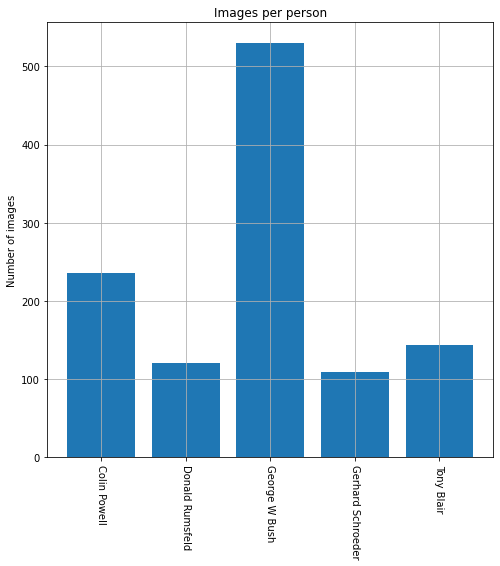

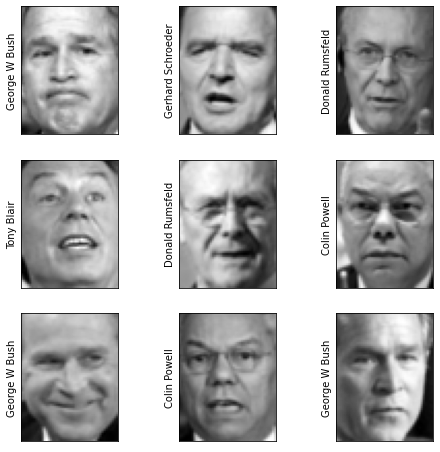

In [ ]:
from sklearn.datasets import fetch_lfw_people
dataset = fetch_lfw_people(min_faces_per_person=100)

X = dataset.images
y = dataset.target
label_to_name_mapping = dataset.target_names
image_shape = X[0].shape

print('Number of images in the dataset: {}'.format(len(X)))
print('Number of different persons in the dataset: {}'.format(len(np.unique(y))))
print('Each images size is: {}'.format(image_shape))

_, images_per_class = np.unique(y, return_counts=True)
fig, ax = plt.subplots()
ax.bar(label_to_name_mapping, images_per_class)
ax.set_xticklabels(label_to_name_mapping, rotation=-90);
ax.set_title('Images per person')
ax.set_ylabel('Number of images')


# plots the first 20 images in the dataset. 
fig, ax_array = plt.subplots(3, 3)
for i, ax in enumerate(ax_array.flat):
    ax.imshow(X[i], cmap='gray')
    ax.set_ylabel(label_to_name_mapping[y[i]])
    ax.set_yticks([])
    ax.set_xticks([])

In [ ]:
from sklearn.model_selection import train_test_split
# split the data into 80% training set and 20% testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)

(912, 62, 47)
(228, 62, 47)




---



---
# Q2: Logistic regression with Softmax (20pt)
Let's do multi-class classification with the softmax function. 
Remember the model is as follows: 

1. the probability for $K$ classes are  
\begin{align}
p(y=c |\mathbf{x}, \mathbf{W}) = \frac{\exp(\mathbf{x}\cdot \mathbf{w}_c )}{\sum_{j=0}^{K-1} \exp(\mathbf{x} \cdot\mathbf{w}_j ) }
\end{align}
where $\mathbf{w}_c $ is $c$-th column of $\mathbf{W}$. Here we ignore the bias vector. 

2. In prediction, you will take the largest predicted probability among your $K$ predicted probability. 

3. The negative log-likelihood function on the $N$ training dataset is 
\begin{align}
\text{NLL}(\mathbf{W}) = -\frac{1}{N}\sum_{i=1}^N \log p(y=y^{(i)} | \mathbf{x}^{(i)}, \mathbf{W})
\end{align}



---


### Q2.1 Derivative (10pt)
Express the label $y$ into one hot vector, i.e., $y=c$ is represented by $\vec{y}$ with $\vec{y}_c =1$ and other indices are zero. 

Calculate the derivative of the negative log-likelihood with respect to the variable $\mathbf{W}$. Write this in a natural manner in terms of conditional probability, the data matrix $\mathbf{X}$. Don't write this expression in terms of exponentials explicitly. 
You may refer to results in previous lectures. 


# Your Answer: 



---


### Q2.2 Implementation (10pt)
(a) Implement softmax classification with SGD. Specify your learning rate. Here you may try constant learning rate.

(b) For both training dataset and testing dataset, plot the negative log-likelihood as function of the epoch number. 

(c) For both training dataset and testing dataset, plot the misclassification rate as function of the epoch number.

(d) How many iterations did this take you? 



In [ ]:
# Q2.2: your code starts here. 


# Your Answer: 



---


### Q2.3 (optional) Compare with full batch gradient descent 

(a) Implement the previous algorithm with full batch gradient descent. What learning rate did you use? 

(b) Please plot the similar plots as you did in the previous question. 

(c) At last, compare the computational complexity it took you to reach a comparable misclassification rate on your training set. 

(d) Do you think SGD performs better than full batch gradient descent or not? 

In [ ]:
# Q2.3: your code starts here. 


# Your Answer: 



---



---


# Q3: Deep neural network with Sigmoid function and squared loss (20pt)
In class, we showed how to implement DNN with the sigmoid function as the activation function. In particular, the output layer also uses the sigmoid function. Here you may try constant learning rate.

(a) Please setup your own deep neural network to classify these faces. Here you can use sigmoid function as activation function and output function, and you can use the square loss function as well. But you have to choose the number of the layer and hidden neurons by yourself. **Happy tuning!**

(b) For both training dataset and testing dataset, plot the cost as function of the epoch number. 

(c) For both training dataset and testing dataset, plot the misclassification rate as function of the epoch number.

(d) Did DNN performs better than logistic regression or not? 


In [ ]:
# Q3: your code starts here. 


# Your Answer:



---



---

# Q4: Deep neural network with Relu function and squared loss (30pt)
Another popular choice of the activation function is relu function. 

(a) Modify your code to use Relu function in these hidden nueron layer and sigmoid/softmax function in the output layer. You may try  1 hidden layer of 1024 neurons in this case.  i.e., 

- A fully connected (linear) layer with an input of the n_features and output of 1024.
- A ReLU layer
- A fully connected (linear) layer with an input of 1024 and output of n_classes.
- A softmax function.


(b) Compare the performance with Q2 and Q3. 

In [ ]:
# Q4: your code starts here. 


# Your Answer:



---



---


# Q5: (optional) Deep neural network with logistic loss
(a) What about switching to logistic loss? Do you find it is nearly impossible to tune here due to the vanishing gradient and other errors/warnings?

(b) Please dig out the root cause and fix it! You should get similar performance as the square loss.



In [ ]:
# Q5: Your code starts here

# Your Answer: